In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)


import zipfile
import os

Mounted at /content/drive


In [3]:

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2024-10-21 11:49:00--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.62.176.164, 2600:1406:bc00:b89::317f, 2600:1406:bc00:b87::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.62.176.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M   200MB/s    in 3.9s    

2024-10-21 11:49:04 (200 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



In [4]:
print(f"Total number of Cats is {len(os.listdir('/tmp/PetImages/Cat/'))}")
# Total number of Dogs.
print(f"Total number of Dogs is {len(os.listdir('/tmp/PetImages/Dog/'))}")

Total number of Cats is 12501
Total number of Dogs is 12501


In [5]:
try:
  os.mkdir("/tmp/cats-vs-dogs")
  os.mkdir("/tmp/cats-vs-dogs/training")
  os.mkdir("/tmp/cats-vs-dogs/validation")
  os.mkdir("/tmp/cats-vs-dogs/training/Cats")
  os.mkdir("/tmp/cats-vs-dogs/training/Dogs")
  os.mkdir("/tmp/cats-vs-dogs/validation/Cats")
  os.mkdir("/tmp/cats-vs-dogs/validation/Dogs")
except OSError:
  pass


In [6]:
from shutil import  copyfile
import random
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
  files = []
  for filename in os.listdir(SOURCE):
    file = SOURCE + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename, "is zero length, so ignoring!")

  training_length = int(len(files) * SPLIT_SIZE)
  validation_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  validation_set = shuffled_set[0:validation_length]

  for filename in training_set:
    this_file = SOURCE + filename
    destination = TRAINING + filename
    copyfile(this_file, destination)

  for filename in validation_set:
    this_file = SOURCE + filename
    destination = VALIDATION + filename
    copyfile(this_file, destination)


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CAT_DIR = "/tmp/cats-vs-dogs/training/Cats/"
VALIDATION_CAT_DIR = "/tmp/cats-vs-dogs/validation/Cats/"

DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOG_DIR = "/tmp/cats-vs-dogs/training/Dogs/"
VALIDATION_DOG_DIR = "/tmp/cats-vs-dogs/validation/Dogs/"

SPLIT_SIZE = 0.9

split_data(CAT_SOURCE_DIR, TRAINING_CAT_DIR, VALIDATION_CAT_DIR, SPLIT_SIZE)
split_data(DOG_SOURCE_DIR, TRAINING_DOG_DIR, VALIDATION_DOG_DIR, SPLIT_SIZE)

666.jpg is zero length, so ignoring!
11702.jpg is zero length, so ignoring!


In [7]:
print(f"Total number of training Cats is {len(os.listdir('/tmp/cats-vs-dogs/training/Cats/'))}")
print(f"Total number of training Dogs is {len(os.listdir('/tmp/cats-vs-dogs/training/Dogs/'))}")

# Total number of images in Validation
print(f"Total number of validation Cats is {len(os.listdir('/tmp/cats-vs-dogs/validation/Cats/'))}")
print(f"Total number of validation Dogs is {len(os.listdir('/tmp/cats-vs-dogs/validation/Dogs/'))}")



Total number of training Cats is 12388
Total number of training Dogs is 12380
Total number of validation Cats is 2384
Total number of validation Dogs is 2364


In [8]:
train_data_dir = os.path.join("/tmp/cats-vs-dogs/training/")


# Directory with validation cats images
validation_data_dir = os.path.join("/tmp/cats-vs-dogs/validation/")



In [9]:
import tensorflow as tf
base_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
for layers in base_model.layers:
   layers.trainable = False


x = tf.keras.layers.Flatten(name='flatten')(base_model.output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(2,  activation='softmax')(x)



model = tf.keras.models.Model(inputs=base_model.input,outputs=x, name='VGG16')
opti_fun = tf.keras.optimizers.SGD(learning_rate =1e-4)
loss_fun = 'categorical_crossentropy'
model.compile(optimizer=opti_fun, loss=loss_fun, metrics=['accuracy'])

model.summary()


Model: "VGG16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,823,938 (106.14 MB)

 Trainable params: 13,109,250 (50.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [10]:
# train_data_dir='/content/drive/MyDrive/Computer vision/dogvscat/train'
# validation_data_dir='/content/drive/MyDrive/Computer vision/dogvscat/test'
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory(
      train_data_dir,
      target_size=(224, 224),
      batch_size= 32,
      shuffle=True,
      class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical')

Found 24766 images belonging to 2 classes.
Found 4748 images belonging to 2 classes.


In [ ]:

model_save_path='/content/drive/MyDrive/Computer vision/dogvscat'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(model_save_path+model.name+'.keras',monitor='val_loss',  verbose=1,save_best_only=True)
# Use model.fit instead of model.fit_generator
history = model.fit(train_generator,
                                  epochs=10,
                                  validation_data=validation_generator,
                                  callbacks=[model_checkpoint])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 49/704 ━━━━━━━━━━━━━━━━━━━━ 1:30 138ms/step - accuracy: 0.5145 - loss: 0.7069

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.6598 - loss: 0.6258
Epoch 1: val_loss improved from inf to 0.46012, saving model to /content/drive/MyDrive/Computer vision/dogvscatVGG16.keras
704/704 ━━━━━━━━━━━━━━━━━━━━ 142s 179ms/step - accuracy: 0.6599 - loss: 0.6258 - val_accuracy: 0.8320 - val_loss: 0.4601
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.8360 - loss: 0.4419
Epoch 2: val_loss improved from 0.46012 to 0.37733, saving model to /content/drive/MyDrive/Computer vision/dogvscatVGG16.keras
704/704 ━━━━━━━━━━━━━━━━━━━━ 107s 149ms/step - accuracy: 0.8360 - loss: 0.4419 - val_accuracy: 0.8540 - val_loss: 0.3773
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.8630 - loss: 0.3652
Epoch 3: val_loss improved from 0.37733 to 0.33197, saving model to /content/drive/MyDrive/Computer vision/dogvscatVGG16.keras
704/704 ━━━━━━━━━━━━━━━━━━━━ 142s 150ms/step - accuracy: 0.8630 - loss: 0.3652 - val_accuracy: 0.8728 - val_loss: 0.3320
Epoch 4

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
base_model = tf.keras.models.load_model('/content/drive/MyDrive/Computer vision/dogvscatVGG16.keras')

In [12]:
dictionary=['cat','dog']

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[0.13767801 0.862322  ]
1


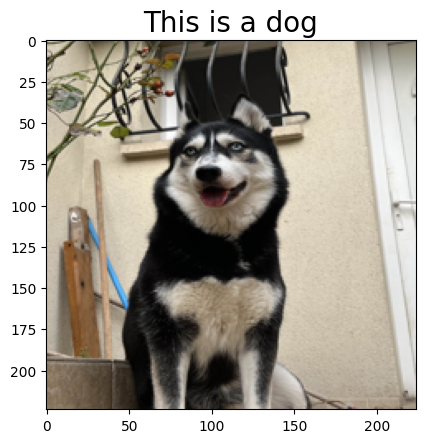

In [13]:
from PIL import Image
img=cv2.imread('/content/drive/MyDrive/Computer vision/husky.png')


img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_RGB = img_RGB / 255.0
img_RGB = cv2.resize(img_RGB, (224, 224))
img_batch = np.reshape(img_RGB, (1, 224, 224, 3))
pred = base_model.predict(img_batch)
print(pred[0])
index = np.argmax(pred[0])
print(index)

image_test=Image.open('/content/drive/MyDrive/Computer vision/husky.png')
newsize = (224, 224)
image_test = image_test.resize(newsize)
fig = plt.figure()
plt.imshow(image_test)

plt.title("This is a "+dictionary[index],fontsize=20)
plt.imshow(image_test)
plt.show()